<a href="https://colab.research.google.com/github/Kikkas01/Python-for-analytics/blob/Lesson4/%D0%A3%D1%80%D0%BE%D0%BA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 4. Задание 1.
Скачать датасет о качестве КРАСНОГО вина по ссылке.
https://archive.ics.uci.edu/ml/datasets/wine+quality

In [318]:
import pandas as pd
import requests,zipfile,io 
import matplotlib.pyplot as plt 
import seaborn as sns

In [319]:
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter = ';')
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [320]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [321]:
df1.shape

(1599, 12)

In [322]:
sum(df1.duplicated())

240

In [323]:
df1 = df1.drop_duplicates()
df1.shape

(1359, 12)

# Урок 4. Задание 2.
На основе переменной quality с оценками вина создать новую переменную good:
если quality > 5, то 1, иначе 0.

In [324]:
df1['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [325]:
df1['good'] = df1['quality'].apply(lambda x: 1 if x > 5 else 0)
df1.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,0


In [326]:
df1.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', \
                'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)
df1.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


# Урок 4. Задание 3.
Исследовать, какие химические характеристики вина влияют на то, окажется оно
хорошим или плохим, с применением не менее 5 диаграмм из урока.
Отчет сделать в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [327]:
plt.style.use('fivethirtyeight')

In [328]:
# Выделим долю вина, оцененого как хорошее:
data = df1['good'].value_counts()
data.head()

1    719
0    640
Name: good, dtype: int64

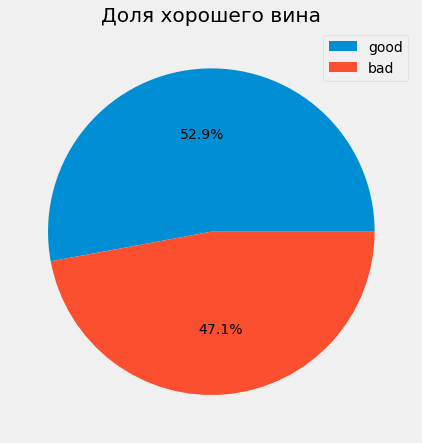

In [329]:
plt.figure(figsize = (10,7))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля хорошего вина')
plt.legend(['good', 'bad'])

plt.show()
# На данной диаграмме мы видим, что доля хорошего вина (с оценкой > 5) чуть выше, что в целом нам даёт 
# хорошее качество выборки без перекоса в сторону плохого или хорошего. 

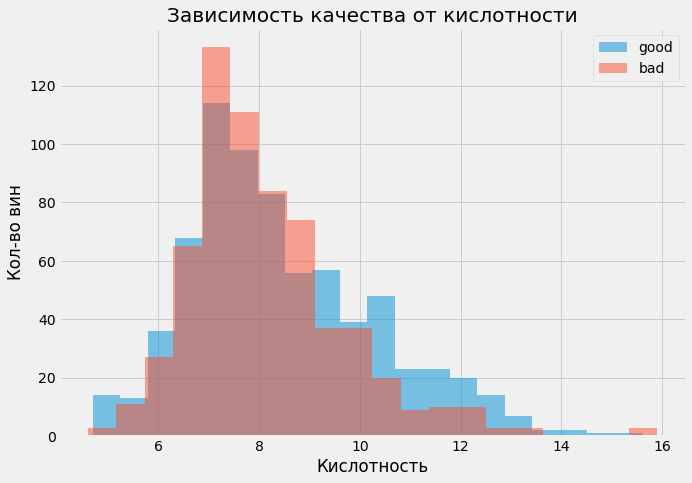

In [330]:
# Построим диаграмму зависимости качества от кислотности
import numpy as np

plt.figure(figsize = (10,7))

plt.hist(df1['fixed_acidity'].loc[df1['good'] == 1], alpha = 0.5, label = 'good', bins = 20)
plt.hist(df1['fixed_acidity'].loc[df1['good'] == 0], alpha = 0.5, label = 'bad', bins = 20)

plt.title('Зависимость качества от кислотности')
plt.xlabel('Кислотность')
plt.ylabel('Кол-во вин')
plt.legend()
# plt.xticks(np.arange(0, 16, 1))

plt.show()
# Полученная диаграмма говорит об отсутствии прямой связи между кислотностью вина и его 
# восприятием как качественного вина, мы лишь видим, что наибольшее количество вин обладают
# кислотностью в диапазоне от 7 до 9
# P.S. Не понял, почему не сработал закомментированный метод xticks, буду признателен за ОС при проверке задания

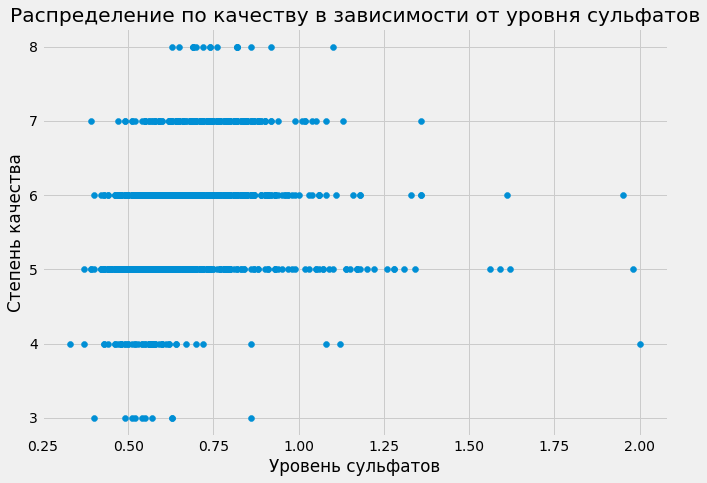

In [331]:
# попробуем оценить качество вина по уровню сульфатов:

plt.figure(figsize = (10,7))

plt.scatter(df1['sulphates'], df1['quality'] )

plt.title('Распределение по качеству в зависимости от уровня сульфатов')
plt.xlabel('Уровень сульфатов')
plt.ylabel('Степень качества')


plt.show()

# В полученном распределении видим, что уровень сульфатов влияет на степень качества вина
# чтобы попадать в качественную зону > 5, сульфаты должны быть в диапазоне +/- от 0,5 до 0,9

In [332]:
# Подготовим данные для оценки влияния крепости вина на признание его качественным:
data1 = df1.groupby('alcohol')['quality'].agg(mean = 'mean').reset_index().sort_values(by = 'alcohol')
data1.head(10)

,alcohol,mean
0,8.400000,4.500000
1,8.500000,5.000000
2,8.700000,6.000000
3,8.800000,5.000000
4,9.000000,5.190476
5,9.050000,4.000000
6,9.100000,5.190476
7,9.200000,5.200000
8,9.233333,6.000000
9,9.250000,6.000000


In [333]:
# Выясним максимальное и минимальное значение по крепости (для справки):
df1['alcohol'].max()

14.9

In [334]:
df1['alcohol'].min()

8.4

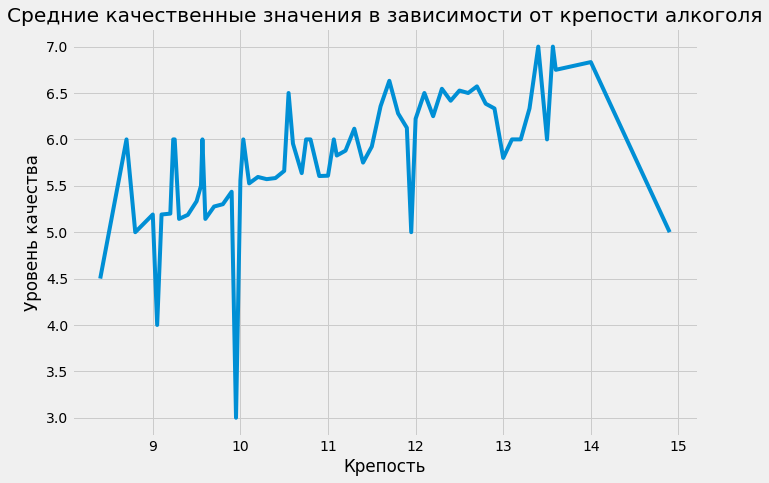

In [335]:
plt.figure(figsize = (10,7))

plt.plot(data1['alcohol'], data1['mean'])

plt.title('Средние качественные значения в зависимости от крепости алкоголя')
plt.xlabel('Крепость')
plt.ylabel('Уровень качества')

plt.show()
# На полученном графике видно, что в среднем есть восходящий тренд качества вина с ростом 
# его крепости, т.е. спиртуозность напрямую влияет на оценку экспертов. 
# Однако, это происходит только до значений 13,5-14 градусов, выше оценка резко падает

In [336]:
# корреляционная матрица химических характеристик
correlation = round(df1.corr(),2)
correlation

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,good
fixed_acidity,1.00,-0.26,0.67,0.11,0.09,-0.14,-0.10,0.67,-0.69,0.19,-0.06,0.12,0.09
volatile_acidity,-0.26,1.00,-0.55,-0.00,0.06,-0.02,0.07,0.02,0.25,-0.26,-0.20,-0.40,-0.33
citric_acid,0.67,-0.55,1.00,0.14,0.21,-0.05,0.05,0.36,-0.55,0.33,0.11,0.23,0.17
residual_sugar,0.11,-0.00,0.14,1.00,0.03,0.16,0.20,0.32,-0.08,-0.01,0.06,0.01,-0.00
chlorides,0.09,0.06,0.21,0.03,1.00,0.00,0.05,0.19,-0.27,0.39,-0.22,-0.13,-0.12
free_sulfur_dioxide,-0.14,-0.02,-0.05,0.16,0.00,1.00,0.67,-0.02,0.06,0.05,-0.08,-0.05,-0.07
total_sulfur_dioxide,-0.10,0.07,0.05,0.20,0.05,0.67,1.00,0.08,-0.08,0.04,-0.22,-0.18,-0.24
density,0.67,0.02,0.36,0.32,0.19,-0.02,0.08,1.00,-0.36,0.15,-0.50,-0.18,-0.17
pH,-0.69,0.25,-0.55,-0.08,-0.27,0.06,-0.08,-0.36,1.00,-0.21,0.21,-0.06,0.00
sulphates,0.19,-0.26,0.33,-0.01,0.39,0.05,0.04,0.15,-0.21,1.00,0.09,0.25,0.21


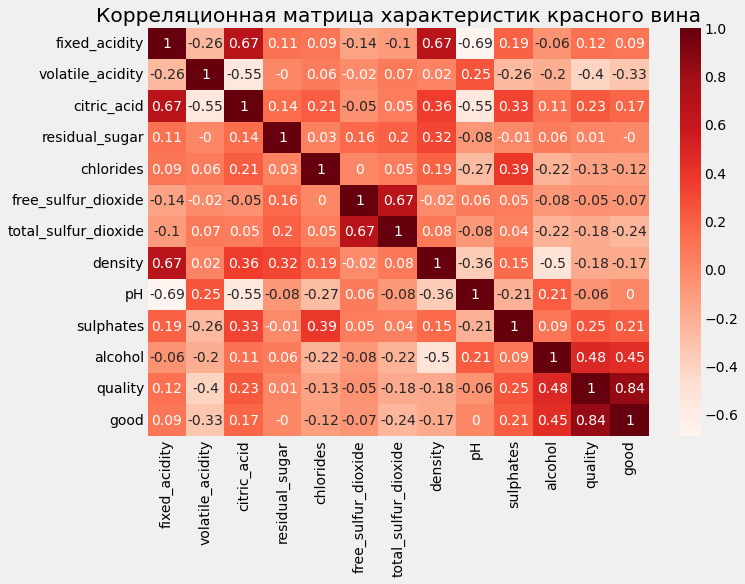

In [337]:
plt.figure(figsize = (10,7))
sns.heatmap(correlation, cmap = 'Reds', annot = True)
plt.title('Корреляционная матрица характеристик красного вина')
plt.show()
# Из полученной тепловой карты видно, что наибольшая прямая корреляция с качеством вина наблюдается у 
# показателей крепости (алкоголь) и уровня сульфатов. Т.е. при увеличении крепости (спиртуозности) и уровня сульфатов
# качество вина растёт. Также присутствует обратная корреляция с показателями летучей кислотности и 
# содержанием двуокиси серы, т.е. теоретически можно предположить, что снижение данных показателей поможет
# сделать вино более качественным

In [338]:
# Поскольку из тепловой карты видно, что есть прямая корреляция сульфатов и качества, а из графика
# распределения по сульфатам - что качество повышается только до определенного их уровня, построим 
# еще дополнительно боксплот:
data2 = df1['sulphates'].loc[df1['good'] == 1]
data3 = df1['sulphates'].loc[df1['good'] == 0]
data2.head()

3     0.58
7     0.47
8     0.57
16    0.75
19    1.08
Name: sulphates, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


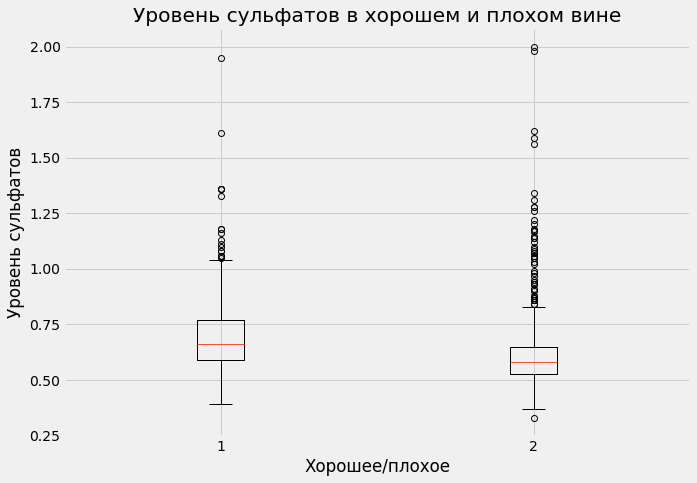

In [339]:
plt.figure(figsize = (10,7))

plt.boxplot([data2, data3])

plt.title('Уровень сульфатов в хорошем и плохом вине')
plt.xlabel('Хорошее/плохое')
plt.ylabel('Уровень сульфатов')
# plt.xticks([1, 2],['yes', 'no'])

plt.show()

# На данном графике видно, что основное количество значений, позволяющих получить качественную оценку
# содержится в диапазоне от 0,6 до 0,8
# P.S. Но мне не очень понятен смысл "выбросов", буду признателен за ОС при проверке задания.
# И также не понятен не работающий метод xticks, который я закомментировал в итоге...  